In [145]:
# importing libraris
import pandas as pd               # data manupulation library
import numpy as np                # numerical computing library
import matplotlib.pyplot as plt   # visualization library
import seaborn as sns             # visualization library

In [146]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [147]:
from google.colab import files
uploaded = files.upload()

Saving summer.csv to summer (7).csv


In [148]:
import io
summer_olympic = pd.read_csv(io.BytesIO(uploaded['summer.csv']))
# Dataset is now stored in a Pandas Dataframe

In [149]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (8).csv


In [150]:
import io
titanic = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
# Dataset is now stored in a Pandas Dataframe

In [151]:
summer_olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [152]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


In [153]:
titanic[:2]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


In [154]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [155]:
features_with_na=[i for i in titanic.columns if titanic[i].isnull().sum()>1]
for i in features_with_na:
  print(i,np.round(titanic[i].isnull().mean(),4),"% of missing values")

age 0.1987 % of missing values
embarked 0.0022 % of missing values
deck 0.7722 % of missing values


In [156]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [157]:
titanic[titanic["age"].isnull()]["sex"].value_counts()

male      124
female     53
Name: sex, dtype: int64

In [158]:

# basic statistical property of the dataset
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [159]:
titanic[titanic["age"].isnull()]["survived"].value_counts()

0    125
1     52
Name: survived, dtype: int64

In [160]:
titanic["age"].mean()

29.69911764705882

In [161]:
print(titanic.groupby("survived")["age"].mean())
print(titanic.groupby("survived")["age"].median())

survived
0    30.626179
1    28.343690
Name: age, dtype: float64
survived
0    28.0
1    28.0
Name: age, dtype: float64


In [162]:
age_imputation =(titanic.groupby(["survived","sex"])["age"].mean())
age_imputation 

survived  sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: age, dtype: float64

In [163]:
#Age inputation

In [164]:
titanic_age_null=titanic[titanic["age"].isnull()]
titanic_age_not_null=titanic[titanic["age"].notnull()]

In [165]:
titanic_age_not_null.shape

(714, 9)

In [166]:
titanic_age_null.shape

(177, 9)

In [167]:
titanic_age_null = titanic_age_null.drop("age",axis = 1)

In [168]:
titanic_age_null

,survived,pclass,sex,sibsp,parch,fare,embarked,deck
5,0,3,male,0,0,8.4583,Q,NaN
17,1,2,male,0,0,13.0000,S,NaN
19,1,3,female,0,0,7.2250,C,NaN
26,0,3,male,0,0,7.2250,C,NaN
28,1,3,female,0,0,7.8792,Q,NaN
...,...,...,...,...,...,...,...,...
859,0,3,male,0,0,7.2292,C,NaN
863,0,3,female,8,2,69.5500,S,NaN
868,0,3,male,0,0,9.5000,S,NaN
878,0,3,male,0,0,7.8958,S,NaN


In [169]:
titanic_age_null=titanic_age_null.merge(age_imputation,how="left",on=["survived","sex"])

In [170]:
titanic_age_null

,survived,pclass,sex,sibsp,parch,fare,embarked,deck,age
0,0,3,male,0,0,8.4583,Q,NaN,31.618056
1,1,2,male,0,0,13.0000,S,NaN,27.276022
2,1,3,female,0,0,7.2250,C,NaN,28.847716
3,0,3,male,0,0,7.2250,C,NaN,31.618056
4,1,3,female,0,0,7.8792,Q,NaN,28.847716
...,...,...,...,...,...,...,...,...,...
172,0,3,male,0,0,7.2292,C,NaN,31.618056
173,0,3,female,8,2,69.5500,S,NaN,25.046875
174,0,3,male,0,0,9.5000,S,NaN,31.618056
175,0,3,male,0,0,7.8958,S,NaN,31.618056


In [171]:
titanic_age_imputed=pd.concat([titanic_age_not_null,titanic_age_null],axis=0)

In [172]:

titanic_age_imputed.shape

(891, 9)

In [173]:
features_with_na=[i for i in titanic_age_imputed.columns if titanic_age_imputed[i].isnull().sum()>1 ]
for i in features_with_na:
  print(i,np.round(titanic_age_imputed[i].isnull().mean(),4),"% of missing values")

embarked 0.0022 % of missing values
deck 0.7722 % of missing values


In [174]:
print(titanic_age_imputed.groupby("survived")["age"].mean())
print(titanic_age_imputed.groupby("survived")["age"].median())


survived
0    30.648537
1    28.346796
Name: age, dtype: float64
survived
0    31.618056
1    28.847716
Name: age, dtype: float64


In [175]:
#data visuallizartion:

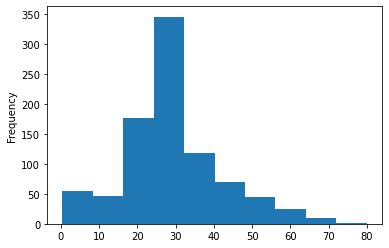

In [176]:
titanic_age_imputed["age"].plot(kind="hist")

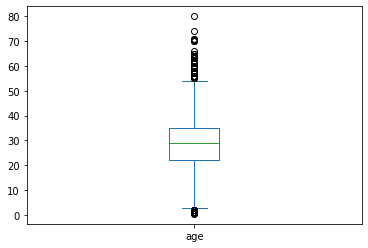

In [177]:
titanic_age_imputed["age"].plot(kind="box")

In [178]:
summer_olympic_numberofmedal = summer_olympic.groupby('Year')['Medal'].count().reset_index(name='Number_of_medals')
summer_olympic_numberofmedal

,Year,Number_of_medals
0,1896,151
1,1900,512
2,1904,470
3,1908,804
4,1912,885
5,1920,1298
6,1924,884
7,1928,710
8,1932,615
9,1936,875


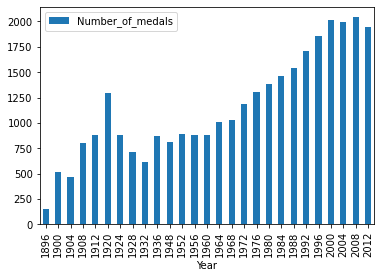

In [179]:
summer_olympic_numberofmedal.set_index("Year").plot(kind="bar")

In [180]:
pd.crosstab(titanic_age_imputed["pclass"],titanic_age_imputed["survived"])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [181]:
pd.crosstab(titanic_age_imputed["sex"],titanic_age_imputed["survived"])

survived,0,1
sex,,
female,81,233
male,468,109


In [182]:
titanic_age_imputed.groupby("pclass")["fare"].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [183]:
summer_olympic.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [184]:
features_with_na=[i for i in summer_olympic.columns if summer_olympic[i].isnull().sum()>1 ]
for i in features_with_na:
  print(i,np.round(summer_olympic[i].isnull().mean(),4),"% of missing values")

Country 0.0001 % of missing values


In [185]:
summer_olympic[summer_olympic["Country"].isnull()].shape

(4, 9)

In [186]:
summer_olympic[~summer_olympic["Country"].isnull()].shape

(31161, 9)

In [187]:
(summer_olympic[~summer_olympic["Country"].isnull()]["Athlete"]=="Pending").value_counts()

False    31161
Name: Athlete, dtype: int64

In [188]:
summer_olympic=summer_olympic.dropna()
print(summer_olympic.isnull().sum())

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64


In [189]:
medal_by_country=summer_olympic.groupby(["Country","Medal"])["Year"].count().reset_index(name='country_medal_count')
medal_by_country.head()

,Country,Medal,country_medal_count
0,AFG,Bronze,2
1,AHO,Silver,1
2,ALG,Bronze,8
3,ALG,Gold,5
4,ALG,Silver,2


In [190]:
summer_olympic=summer_olympic.merge(medal_by_country,how="left",on=["Country","Medal"])


In [191]:
summer_olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,52
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,34
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,62


In [192]:
summer_olympic["Gender_binary"]=pd.get_dummies(summer_olympic["Gender"],drop_first=True)

In [193]:
summer_olympic["Gender_binary"].value_counts()

0    22744
1     8417
Name: Gender_binary, dtype: int64

In [194]:
summer_olympic.groupby("Sport")["Discipline"].nunique().head()

Sport
Aquatics     7
Archery      1
Athletics    1
Badminton    1
Baseball     1
Name: Discipline, dtype: int64

In [195]:
summer_olympic['Sport_discipline'] = summer_olympic['Sport'] + '_' + summer_olympic['Discipline']


In [196]:
summer_olympic

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,52,0,Aquatics_Swimming
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,34,0,Aquatics_Swimming
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,62,0,Aquatics_Swimming
...,...,...,...,...,...,...,...,...,...,...,...,...
31156,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze,231,0,Wrestling_Wrestling Freestyle
31157,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold,16,0,Wrestling_Wrestling Freestyle
31158,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,238,0,Wrestling_Wrestling Freestyle
31159,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze,8,0,Wrestling_Wrestling Freestyle


In [197]:
Sport_discipline=summer_olympic["Sport_discipline"].value_counts().reset_index(name="Sport_discipline_cardinality")
Sport_discipline

,index,Sport_discipline_cardinality
0,Athletics_Athletics,3637
1,Rowing_Rowing,2667
2,Aquatics_Swimming,2628
3,Gymnastics_Artistic G.,2103
4,Fencing_Fencing,1613
...,...,...
62,Cycling_Cycling BMX,6
63,Water Motorsports_Water Motorspor,5
64,Basque Pelota_Basque Pelota,4
65,Jeu de paume_Jeu de Paume,3


In [198]:
summer_olympic=summer_olympic.merge(Sport_discipline,left_on="Sport_discipline",right_on="index",how="left")
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline,index,Sport_discipline_cardinality
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming,Aquatics_Swimming,2628
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming,Aquatics_Swimming,2628


In [199]:
# feature 3: converting every Medal to a number lebel
def lebel_encoder(x):
    if x == 'Gold':
        return 1
    elif x == 'Silver':
        return 2
    else:
        return 3

summer_olympic['Medal_lebel'] = summer_olympic['Medal'].apply(lebel_encoder)
summer_olympic[:2]


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline,index,Sport_discipline_cardinality,Medal_lebel
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming,Aquatics_Swimming,2628,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming,Aquatics_Swimming,2628,2


In [200]:
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline,index,Sport_discipline_cardinality,Medal_lebel
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming,Aquatics_Swimming,2628,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming,Aquatics_Swimming,2628,2


In [201]:
summer_olympic.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline,index,Sport_discipline_cardinality,Medal_lebel
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming,Aquatics_Swimming,2628,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming,Aquatics_Swimming,2628,2
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,52,0,Aquatics_Swimming,Aquatics_Swimming,2628,3
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,34,0,Aquatics_Swimming,Aquatics_Swimming,2628,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,62,0,Aquatics_Swimming,Aquatics_Swimming,2628,2


In [202]:
summer_olympic_event=summer_olympic.groupby("Event")["country_medal_count"].mean().reset_index(name="Event_country_medal_count")
summer_olympic_event

,Event,Event_country_medal_count
0,+ 100KG,326.500000
1,+ 100KG (Heavyweight),243.375000
2,+ 100KG (Super Heavyweight),567.250000
3,+ 105KG,171.666667
4,"+ 108KG, Total (Super Heavyweight)",363.000000
...,...,...
661,York Round (100Y - 80Y - 60Y),755.000000
662,Épée Individual,371.408602
663,Épée Team,390.698701
664,"Épée, Amateurs And Masters",344.666667


In [203]:
summer_olympic=summer_olympic.merge(summer_olympic_event,on="Event",how="left")
summer_olympic[:2]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,country_medal_count,Gender_binary,Sport_discipline,index,Sport_discipline_cardinality,Medal_lebel,Event_country_medal_count
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,412,0,Aquatics_Swimming,Aquatics_Swimming,2628,1,801.75
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,81,0,Aquatics_Swimming,Aquatics_Swimming,2628,2,801.75


In [204]:
summer_olympic_model_data =summer_olympic[["Year","country_medal_count","Gender_binary","Sport_discipline_cardinality","Event_country_medal_count","Medal_lebel"]]
summer_olympic_model_data

,Year,country_medal_count,Gender_binary,Sport_discipline_cardinality,Event_country_medal_count,Medal_lebel
0,1896,412,0,2628,801.750000,1
1,1896,81,0,2628,801.750000,2
2,1896,52,0,2628,49.333333,3
3,1896,34,0,2628,49.333333,1
4,1896,62,0,2628,49.333333,2
...,...,...,...,...,...,...
31156,2012,231,0,71,125.000000,3
31157,2012,16,0,71,147.500000,1
31158,2012,238,0,71,147.500000,2
31159,2012,8,0,71,147.500000,3


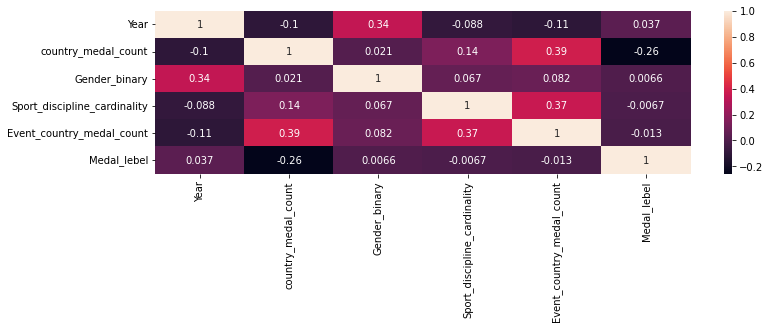

In [205]:
# checking the correlation among the features
plt.figure(figsize=(12,3))
sns.heatmap(summer_olympic_model_data.corr(),annot=True)


In [206]:
 summer_olympic_model_data["Medal_lebel"].value_counts()

1    10484
3    10369
2    10308
Name: Medal_lebel, dtype: int64

In [209]:

from sklearn.model_selection import train_test_split

training_data, validation_data = train_test_split(summer_olympic_model_data,test_size=0.3,shuffle= True, stratify=summer_olympic_model_data['Medal_lebel'],random_state=42)

print('training data shape',training_data.shape)
print('validation data shape',validation_data.shape)


training data shape (21812, 6)
validation data shape (9349, 6)


In [212]:
print(training_data["Medal_lebel"].value_counts())
print(validation_data["Medal_lebel"].value_counts())

1    7339
3    7258
2    7215
Name: Medal_lebel, dtype: int64
1    3145
3    3111
2    3093
Name: Medal_lebel, dtype: int64


In [215]:
# splitting the data into train (75%) test (25%) split for model training
X = training_data.drop(['Medal_lebel'],axis=1).values   # independant features
y = training_data['Medal_lebel'].values	
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle= True, stratify=y, random_state=42)

In [216]:

# Model training
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=42,n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [217]:
y_pred=forest.predict(X_test)

In [218]:
y_pred

array([3, 3, 1, ..., 1, 2, 3])

In [219]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))



              precision    recall  f1-score   support

           1       0.90      0.90      0.90      1835
           2       0.89      0.87      0.88      1804
           3       0.86      0.88      0.87      1814

    accuracy                           0.89      5453
   macro avg       0.89      0.89      0.89      5453
weighted avg       0.89      0.89      0.89      5453

[[1653   73  109]
 [  91 1571  142]
 [  92  117 1605]]
0.885567577480286


In [224]:
x_val=validation_data.drop(["Medal_lebel"],axis=1)
y_val=validation_data["Medal_lebel"]

y_val_pred = forest.predict(x_val)
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))
print(accuracy_score(y_val, y_val_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           1       0.91      0.91      0.91      3145
           2       0.90      0.87      0.89      3093
           3       0.86      0.90      0.88      3111

    accuracy                           0.89      9349
   macro avg       0.89      0.89      0.89      9349
weighted avg       0.89      0.89      0.89      9349

[[2852  117  176]
 [ 131 2696  266]
 [ 139  178 2794]]
0.8922879452347845


In [243]:
x_val.shape

(9349, 5)

In [244]:
y_val_pred.shape

(9349,)

In [249]:
validation_data.head()


,Year,country_medal_count,Gender_binary,Sport_discipline_cardinality,Event_country_medal_count,Medal_lebel
28893,2008,472,1,180,905.166667,3
12926,1972,329,0,3637,324.755556,1
11006,1964,1098,0,894,401.650000,3
30603,2012,296,1,491,275.250000,2
27246,2008,213,0,2628,590.940741,1


In [252]:
validation_data["Medal_lebel_pred"]=y_val_pred
validation_data.head()

,Year,country_medal_count,Gender_binary,Sport_discipline_cardinality,Event_country_medal_count,Medal_lebel,Medal_lebel_pred
28893,2008,472,1,180,905.166667,3,3
12926,1972,329,0,3637,324.755556,1,1
11006,1964,1098,0,894,401.650000,3,3
30603,2012,296,1,491,275.250000,2,2
27246,2008,213,0,2628,590.940741,1,1


In [258]:
# checking feature importance
import numpy as np
 
importances = forest.feature_importances_

In [259]:
importances

array([0.1146488 , 0.69295046, 0.016315  , 0.06316674, 0.112919  ])